In [1]:
#In this notebook i tried cutting some text from an image by clustering
#dbscan seems to fit my expectation for parsing text from an image
#it works by checking adjecency of pixels with a radius, which fits my expectation
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN


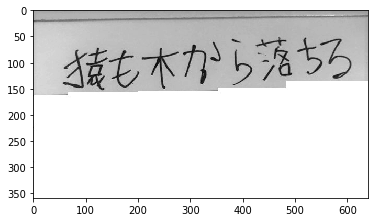

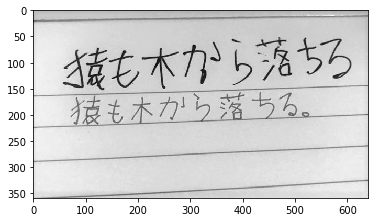

In [2]:
img = cv2.imread('D:/data_teseract/handwriting.jpg', 0)
plt.imshow(img , cmap="gray")
plt.show()

img2= cv2.imread('D:/data_teseract/handwriting2.jpg', 0)
plt.imshow(img2, cmap="gray")

In [3]:
#return image points only above threshold and reverse the row & col
def read_img_with_threshold(img_path,threshold):
    img = cv2.imread(img_path, 0)
    above_threshold = []
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):        
            if img[row,col] < threshold:
                above_threshold.append( (col,img.shape[0]-row) )
    return np.array(above_threshold)             
                

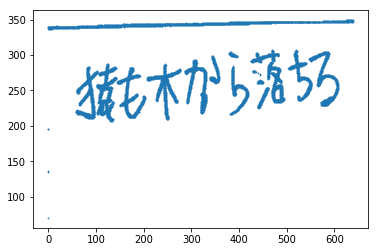

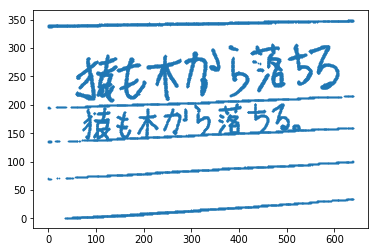

In [5]:
points1 = read_img_with_threshold('D:/data_teseract/handwriting.jpg', 180)
plt.scatter( points1[:,0:1],points1[:,1:2],s=0.5 )

plt.show()

points2 = read_img_with_threshold('D:/data_teseract/handwriting2.jpg', 180)
plt.scatter( points2[:,0:1],points2[:,1:2] ,s=0.5)

In [6]:
def get_points_as_df(points):
    df = pd.DataFrame()
    df["x"] = points[:,0:1].flatten()
    df["y"] = points[:,1:2].flatten()
    return df

In [7]:
df1 = get_points_as_df(points1)
df2 = get_points_as_df(points2)

In [8]:
def apply_kmeans(df,n_clusters):
    k_means=KMeans(n_clusters=n_clusters)
    k_means.fit(df[["x","y"]])
    df['labels']=k_means.labels_
    plt.scatter(df["x"],df["y"],c=df['labels'],s=1)
    plt.title('K-Means')
    plt.show()

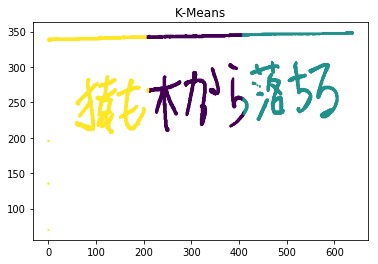

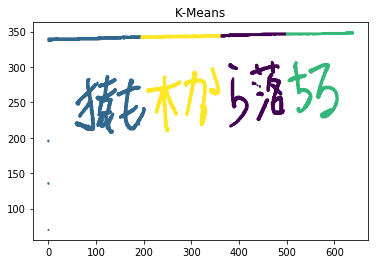

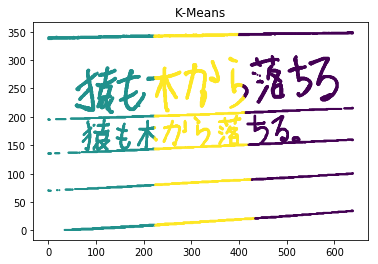

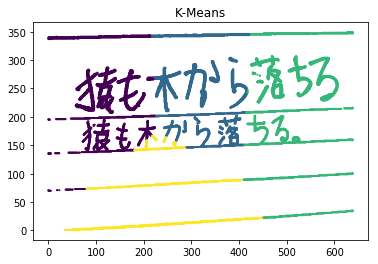

In [9]:
apply_kmeans(df1,3)
apply_kmeans(df1,4)
apply_kmeans(df2,3)
apply_kmeans(df2,4)

In [10]:
def apply_dbscan(df,eps,min_samples):
    dbscan_opt=DBSCAN(eps=eps,min_samples=min_samples)
    dbscan_opt.fit(df[["x","y"]])
    df['labels']=dbscan_opt.labels_

    plt.scatter(df["x"],df["y"],c=df['labels'],s=1)
    plt.title('DBSCAN',fontsize=20)

    plt.show()

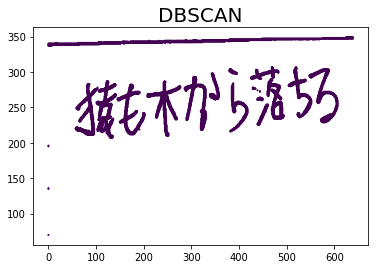

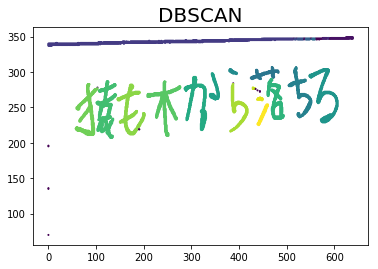

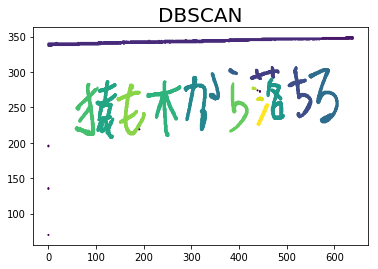

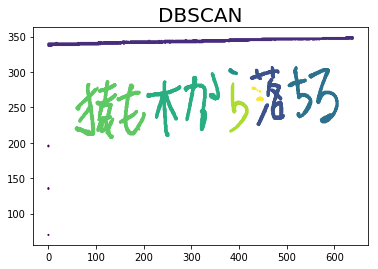

In [11]:
apply_dbscan(df1,eps=0.5,min_samples=6)
apply_dbscan(df1,eps=1.5,min_samples=6)
apply_dbscan(df1,eps=2.5,min_samples=6)
apply_dbscan(df1,eps=10,min_samples=6)
        

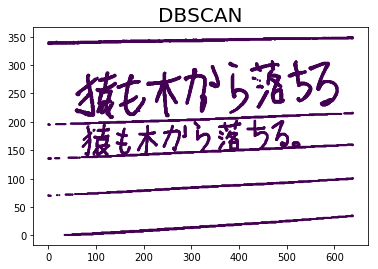

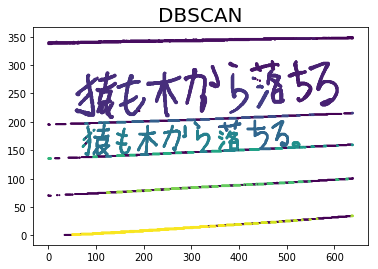

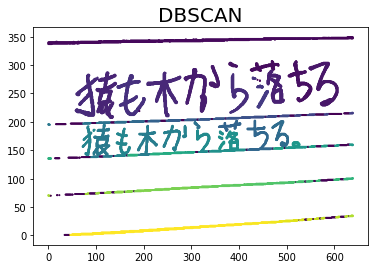

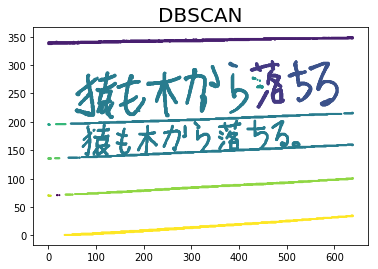

In [12]:
apply_dbscan(df2,eps=0.5,min_samples=6)
apply_dbscan(df2,eps=1.5,min_samples=6)
apply_dbscan(df2,eps=2.5,min_samples=6)
apply_dbscan(df2,eps=10,min_samples=6)

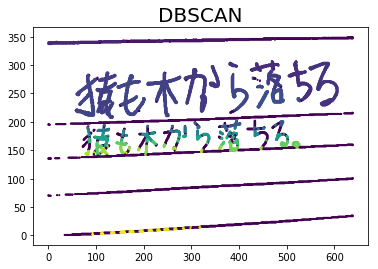

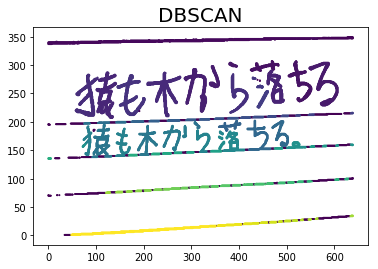

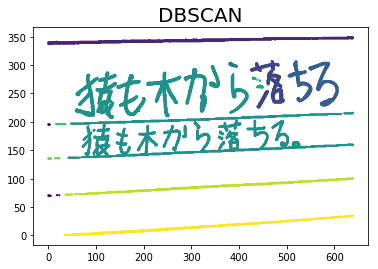

In [14]:
apply_dbscan(df2,eps=1.5,min_samples=8)
apply_dbscan(df2,eps=2.5,min_samples=8)
apply_dbscan(df2,eps=10,min_samples=8)
